# Data Sience Final Exam

Họ và Tên: Trần Ngọc Khánh Văn


Mã số sinh viện: N20DCCN084

Lớp: D20CQCNHT01-N

# Data Information


 Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  In the above reference, two datasets were created, using red and white wine samples.
  The inputs include objective tests (e.g. PH values) and the output is based on sensory data
  (median of at least 3 evaluations made by wine experts). Each expert graded the wine quality 
  between 0 (very bad) and 10 (very excellent). Several data mining methods were applied to model
  these datasets under a regression approach. The support vector machine model achieved the
  best results. Several metrics were computed: MAD, confusion matrix for a fixed error tolerance (T),
  etc. Also, we plot the relative importances of the input variables (as measured by a sensitivity
  analysis procedure).
 
4. Relevant Information:

   The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
   For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
   Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
   are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

   These datasets can be viewed as classification or regression tasks.
   The classes are ordered and not balanced (e.g. there are munch more normal wines than
   excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
   or poor wines. Also, we are not sure if all input variables are relevant. So
   it could be interesting to test feature selection methods. 

5. Number of Instances: red wine - 1599; white wine - 4898. 

6. Number of Attributes: 11 + output attribute
  
   Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
   feature selection.

7. Attribute information:

   For more information, read [Cortez et al., 2009].

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

8. Missing Attribute Values: None

# Add Module


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Read Data From CSV

In [2]:
#Read data from csv
#Change the file name to switch between red wine and white wine
wine_dataset = pd.read_csv('winequality-white.csv',sep=';')

# Preprocessing Data


In [3]:
#Shape of the data
wine_dataset.shape

(4898, 12)

In [4]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
wine_dataset['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

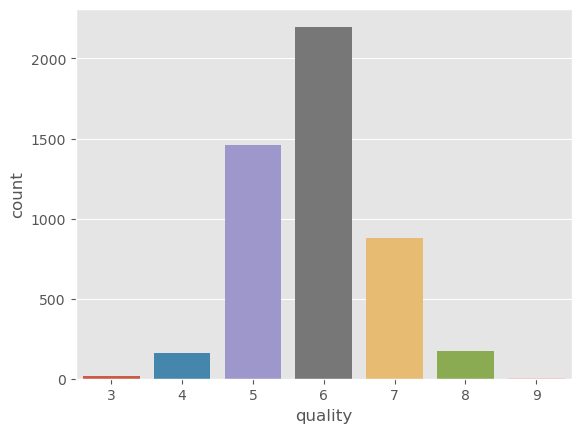

In [9]:
style.use('ggplot')
sns.countplot(x='quality' ,data=wine_dataset)

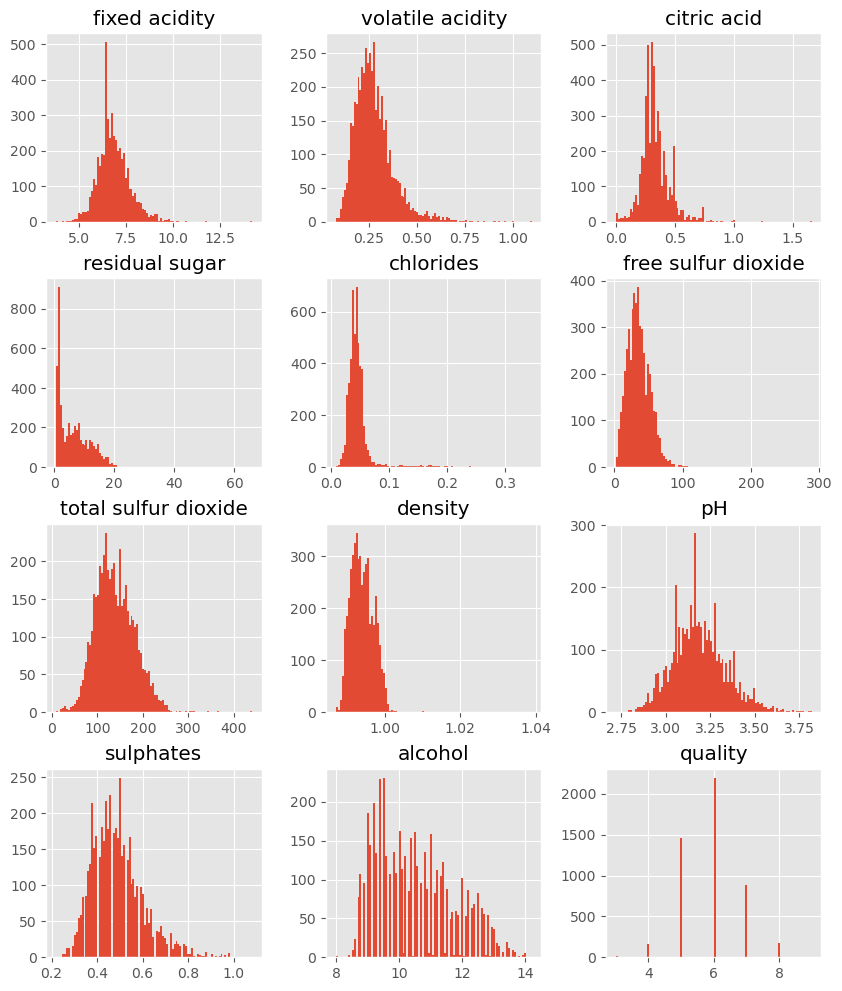

In [10]:
wine_dataset.hist(bins=100, figsize=(10,12))
plt.show()

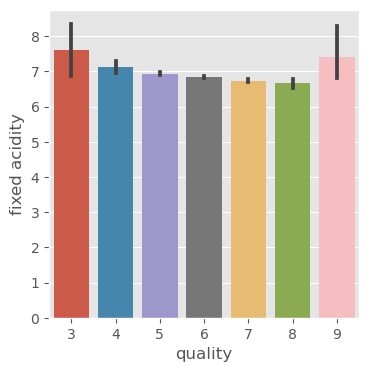

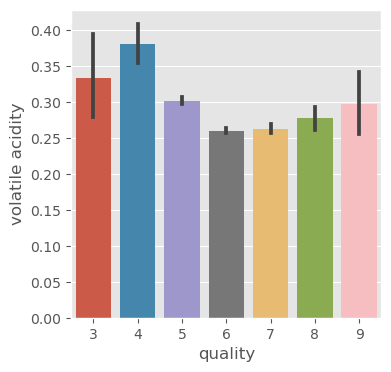

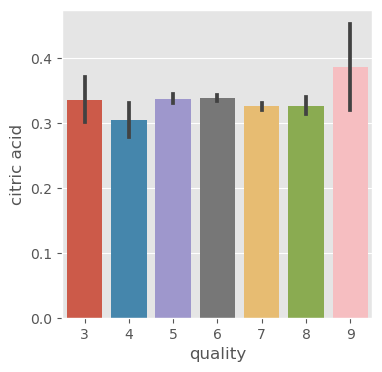

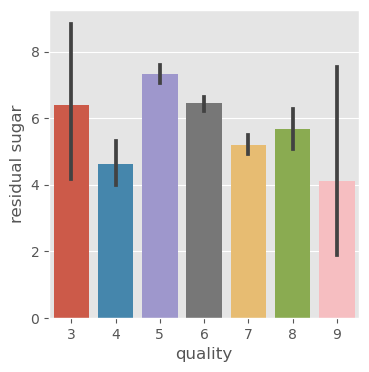

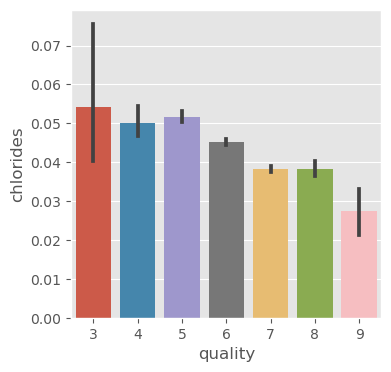

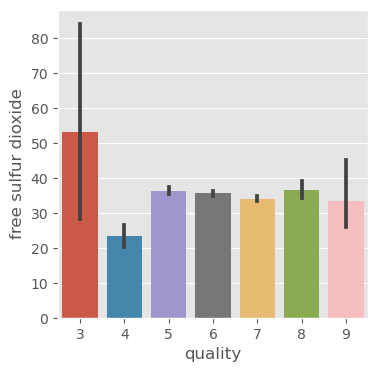

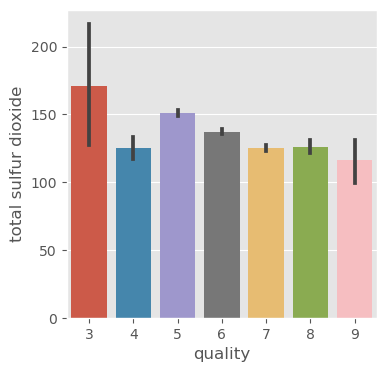

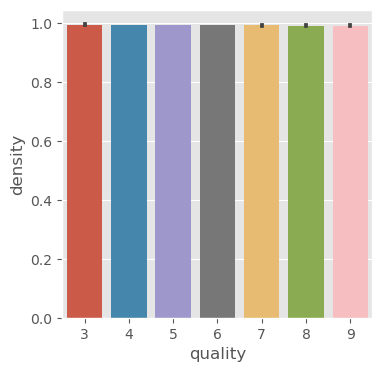

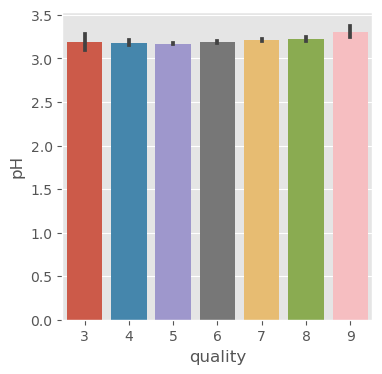

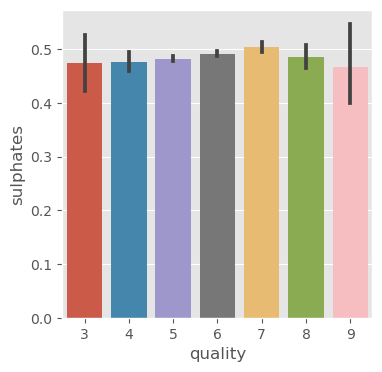

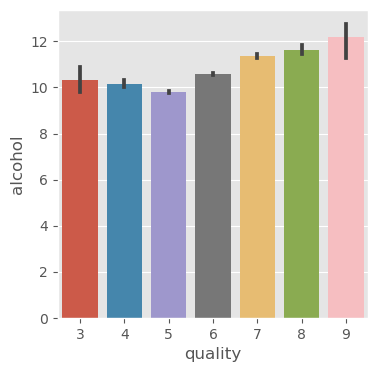

In [11]:
#check which element effect the quality the most
s=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
   "total sulfur dioxide","density","pH","sulphates","alcohol"]
for i in s:
    plot = plt.figure(figsize=(4,4))
    sns.barplot(x='quality', y=i, data=wine_dataset)

<Axes: >

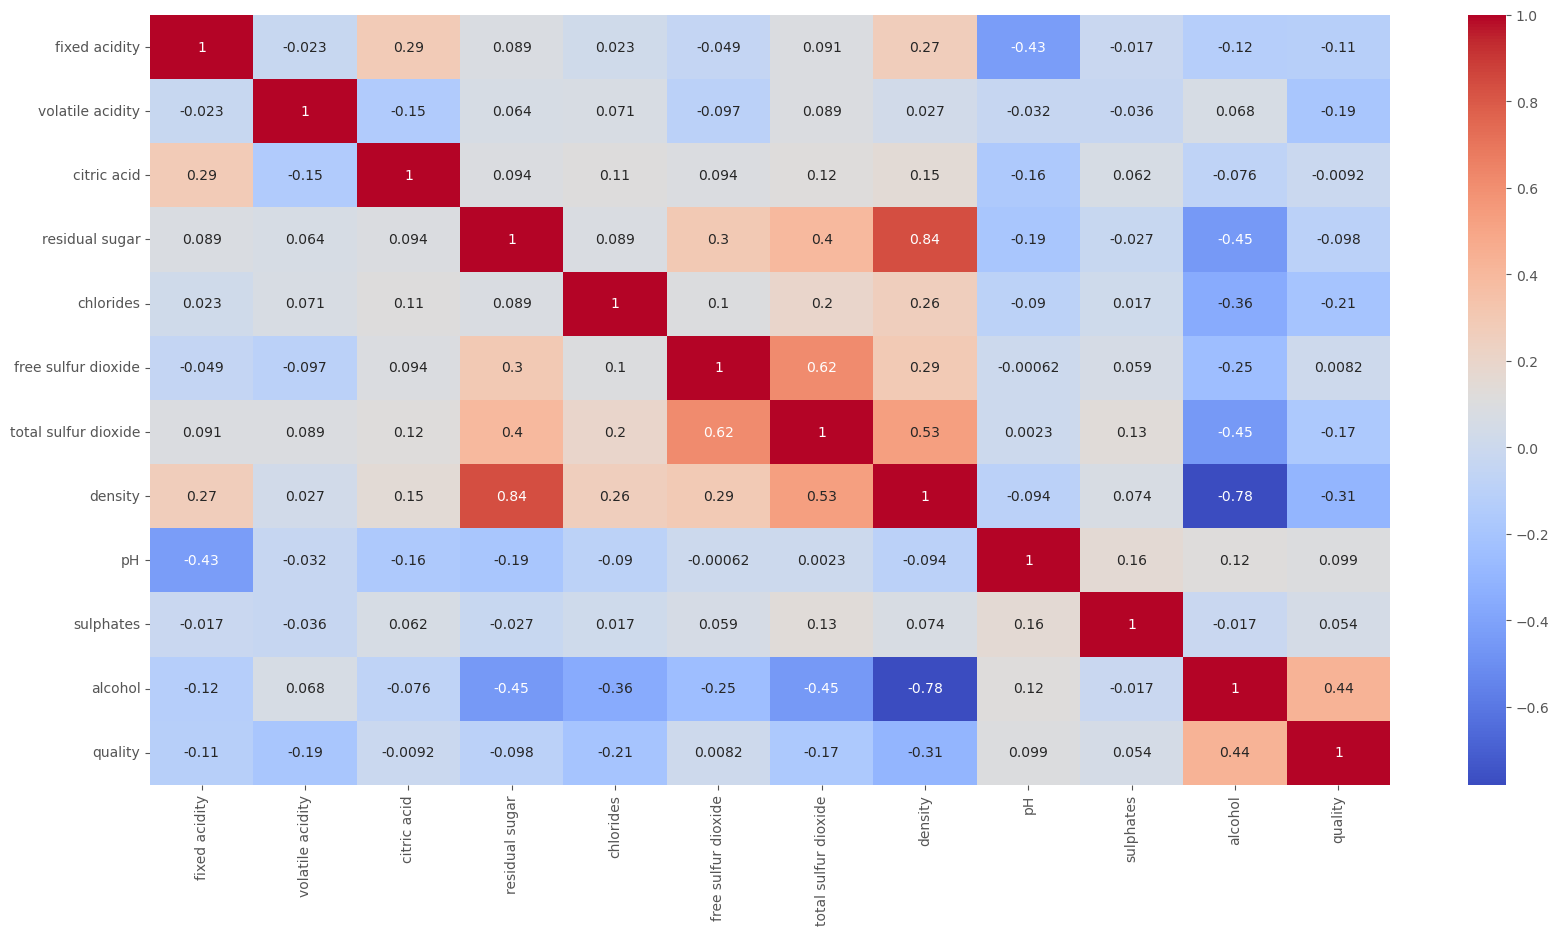

In [12]:
corr = wine_dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Split Processing



In [13]:
#Quality >7 mean good wine and = 1
#Quality <7 mean not good wine and =0
wine_dataset['quality'] = wine_dataset.quality.apply(lambda x:1 if x>=7 else 0)

In [14]:
wine_dataset['quality'].value_counts()

quality
0    3838
1    1060
Name: count, dtype: int64

In [15]:
X = wine_dataset.drop('quality', axis=1)
y = wine_dataset['quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
print("X_train ", X_train.shape)
print("y_train ", y_train.shape)
print("X_test ", X_test.shape)
print("y_test ", y_test.shape)

X_train  (3918, 11)
y_train  (3918,)
X_test  (980, 11)
y_test  (980,)


# Training Module


## Multiple Regression Linear

In [18]:
# Create logistic regression
linear_reg = LinearRegression()

# Training variable
linear_reg.fit(X_train, y_train)

# Prediction
linear_reg_pred = linear_reg.predict(X_test)

#Mean squared error
mse = mean_squared_error(y_test, linear_reg_pred)
print("Mean Squared Error is: {:.2f}".format(mse))

# Calculate R-squared
r2 = r2_score(y_test, linear_reg_pred)
print("R-Squared: {:.2f}".format(r2))

# Calculate mean absolute error
mae = mean_absolute_error(y_test, linear_reg_pred)
print("Mean Absolute Error: {:.2f}".format(mae))

Mean Squared Error is: 0.14
R-Squared: 0.19
Mean Absolute Error: 0.29


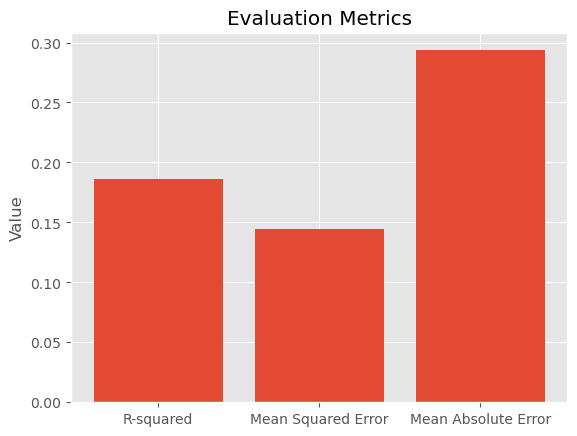

In [19]:
metrics = ['R-squared', 'Mean Squared Error', 'Mean Absolute Error']
values = [r2, mse, mae]

plt.bar(metrics, values)
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.show()

## Logistics Regression

In [20]:
# Create logistic regression
log_reg = LogisticRegression()

# Training variable
log_reg.fit(X_train, y_train)

# Prediction
log_reg_pred = log_reg.predict(X_test)

# Accurance testing
log_reg_acc = accuracy_score(log_reg_pred, y_test)
print("Test accuracy is: {:.2f}%".format(log_reg_acc*100))

Test accuracy is: 78.47%


C:\Users\kvbfr\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


TN:  716
FN:  174
TP:  53
FP:  37


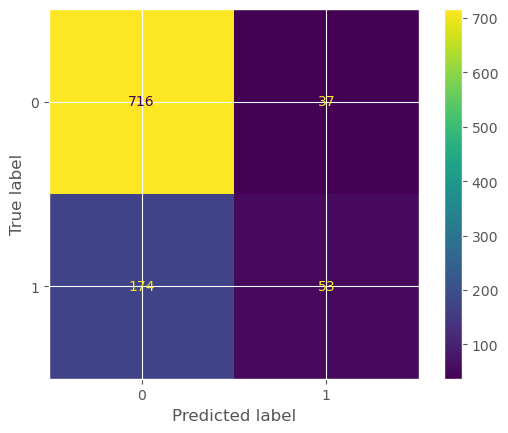

In [21]:
#Confusion matrix
#TN (True Negative), FN (False Negative), TP (True Positive) and FP (False Positive) 
style.use('ggplot')
cm = confusion_matrix(y_test, log_reg_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=log_reg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])